![](https://miro.medium.com/max/1080/1*fUO28EIHi1bkZPhjZ451tQ.jpeg)

In [ ]:
conda install ipywidgets

In [ ]:
conda install seaborn

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import widgets
from ipywidgets import interact, interactive

# Carregar na memória os dataframes da aula anterior

* AtivoCarteira.csv
* AtivoPrecoUnidade.csv
* AtivoTabelaPreco.csv

In [6]:
carteira_df = pd.read_csv('AtivoCarteira.csv')
carteira_df.head()

,ativos,qtd
0,A,15
1,C,38
2,E,101


In [7]:
preco_df = pd.read_csv('AtivoPrecoUnidade.csv', index_col='ativo')
preco_df.head()

,preco_unidade
ativo,
A,14
B,32
C,12
D,13
E,31


In [8]:
tabela_df= pd.read_csv('AtivoTabelaPreco.csv', index_col='DATA')
tabela_df.head()

,A,B,C,D,E
DATA,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614


# Quais colunas apresentam pelo menos um valor acima de 0.04995

In [9]:
acima_do_valor = []
for ativo in tabela_df.columns:
    if np.any(tabela_df[ativo] > 0.04995):
        acima_do_valor.append(ativo)
acima_do_valor

['C', 'D']

Usando o apply ou o any com axis!

In [10]:
tabela_df > 0.04995

,A,B,C,D,E
DATA,,,,,
2017-04-05,False,False,False,False,False
2017-04-06,False,False,False,False,False
2017-04-07,False,False,False,False,False
2017-04-08,False,False,False,False,False
2017-04-09,False,False,False,False,False
...,...,...,...,...,...
2019-12-26,False,False,False,False,False
2019-12-27,False,False,False,False,False
2019-12-28,False,False,False,False,False


In [11]:
(tabela_df > 0.04995).apply(np.any)

A    False
B    False
C     True
D     True
E    False
dtype: bool

In [12]:
np.any(tabela_df > 0.04995, axis=0)

A    False
B    False
C     True
D     True
E    False
dtype: bool

# Calculando o acompanhamento diário

Aula passada usamos o laço "for".

In [13]:
ativos = tabela_df.columns

In [14]:
for ativo in ativos:
    tabela_df[f'{ativo}_cumprod'] = (tabela_df[ativo] + 1).cumprod()
tabela_df

,A,B,C,D,E,A_cumprod,B_cumprod,C_cumprod,D_cumprod,E_cumprod
DATA,,,,,,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951,1.002811,0.981987,1.032058,1.030823,1.048951
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685,1.039938,1.022584,1.048037,1.081275,1.016764
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531,1.028745,0.974359,1.072986,1.083743,0.966403
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722,0.997697,1.008758,1.042825,1.128248,0.970966
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614,0.966254,1.033763,0.994096,1.122725,1.012343
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,-0.031635,0.039970,-0.037060,-0.035755,0.032632,2.449419,0.262362,0.450427,0.571912,0.766283
2019-12-27,-0.024977,-0.031029,0.048233,0.038002,0.045246,2.388240,0.254221,0.472152,0.593646,0.800954
2019-12-28,0.038493,0.012398,-0.045488,-0.004896,0.041029,2.480171,0.257373,0.450675,0.590739,0.833816


Mas tem uma maneira mais interessante. Vamos dropar os cumprods para recalculá-los. 

In [15]:
ativos_cumprod = [f'{ativo}_cumprod' for ativo in ativos]
tabela_df.drop(columns=ativos_cumprod, inplace=True)
tabela_df.head()

,A,B,C,D,E
DATA,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614


Usando o apply!

In [16]:
tabela_df.apply(lambda d: (d + 1).cumprod())

,A,B,C,D,E
DATA,,,,,
2017-04-05,1.002811,0.981987,1.032058,1.030823,1.048951
2017-04-06,1.039938,1.022584,1.048037,1.081275,1.016764
2017-04-07,1.028745,0.974359,1.072986,1.083743,0.966403
2017-04-08,0.997697,1.008758,1.042825,1.128248,0.970966
2017-04-09,0.966254,1.033763,0.994096,1.122725,1.012343
...,...,...,...,...,...
2019-12-26,2.449419,0.262362,0.450427,0.571912,0.766283
2019-12-27,2.388240,0.254221,0.472152,0.593646,0.800954
2019-12-28,2.480171,0.257373,0.450675,0.590739,0.833816


In [17]:
cumprods = tabela_df.apply(lambda d: (d + 1).cumprod())
cumprods

,A,B,C,D,E
DATA,,,,,
2017-04-05,1.002811,0.981987,1.032058,1.030823,1.048951
2017-04-06,1.039938,1.022584,1.048037,1.081275,1.016764
2017-04-07,1.028745,0.974359,1.072986,1.083743,0.966403
2017-04-08,0.997697,1.008758,1.042825,1.128248,0.970966
2017-04-09,0.966254,1.033763,0.994096,1.122725,1.012343
...,...,...,...,...,...
2019-12-26,2.449419,0.262362,0.450427,0.571912,0.766283
2019-12-27,2.388240,0.254221,0.472152,0.593646,0.800954
2019-12-28,2.480171,0.257373,0.450675,0.590739,0.833816


E para calcular o valor final diário podemos usar multiplicação ponto a ponto das matrizes.

In [18]:
preco_df

,preco_unidade
ativo,
A,14
B,32
C,12
D,13
E,31


In [19]:
preco_df.T

ativo,A,B,C,D,E
preco_unidade,14,32,12,13,31


In [20]:
preco_df.T.values

array([[14, 32, 12, 13, 31]], dtype=int64)

In [21]:
cumprods * preco_df.T.values

,A,B,C,D,E
DATA,,,,,
2017-04-05,14.039357,31.423599,12.384701,13.400694,32.517493
2017-04-06,14.559127,32.722675,12.576448,14.056574,31.519695
2017-04-07,14.402427,31.179484,12.875828,14.088664,29.958482
2017-04-08,13.967761,32.280271,12.513894,14.667222,30.099958
2017-04-09,13.527560,33.080424,11.929149,14.595419,31.382635
...,...,...,...,...,...
2019-12-26,34.291865,8.395594,5.405122,7.434858,23.754771
2019-12-27,33.435358,8.135087,5.665829,7.717393,24.829573
2019-12-28,34.722397,8.235942,5.408104,7.679611,25.848309


In [22]:
acompanhamento = cumprods * preco_df.T.values

# Sumarizando

## Jeito 1

In [23]:
# Salvando o nome dos ativos, já que nossa tabela vai crescer.
ativos = tabela_df.columns

# Calculando o cumprod
for ativo in ativos:
    cumprod = (tabela_df[ativo] + 1).cumprod()
    tabela_df[f'{ativo}_cumprod'] = cumprod
display(tabela_df.head())

# Fazendo a multiplicação
for ativo in ativos:
    preco = preco_df.loc[ativo, 'preco_unidade']
    valores_diarios = tabela_df[f'{ativo}_cumprod'] * preco
    tabela_df[f'{ativo}_valor_diario'] = valores_diarios
display(tabela_df.head())


,A,B,C,D,E,A_cumprod,B_cumprod,C_cumprod,D_cumprod,E_cumprod
DATA,,,,,,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951,1.002811,0.981987,1.032058,1.030823,1.048951
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685,1.039938,1.022584,1.048037,1.081275,1.016764
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531,1.028745,0.974359,1.072986,1.083743,0.966403
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722,0.997697,1.008758,1.042825,1.128248,0.970966
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614,0.966254,1.033763,0.994096,1.122725,1.012343


,A,B,C,D,E,A_cumprod,B_cumprod,C_cumprod,D_cumprod,E_cumprod,A_valor_diario,B_valor_diario,C_valor_diario,D_valor_diario,E_valor_diario
DATA,,,,,,,,,,,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951,1.002811,0.981987,1.032058,1.030823,1.048951,14.039357,31.423599,12.384701,13.400694,32.517493
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685,1.039938,1.022584,1.048037,1.081275,1.016764,14.559127,32.722675,12.576448,14.056574,31.519695
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531,1.028745,0.974359,1.072986,1.083743,0.966403,14.402427,31.179484,12.875828,14.088664,29.958482
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722,0.997697,1.008758,1.042825,1.128248,0.970966,13.967761,32.280271,12.513894,14.667222,30.099958
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614,0.966254,1.033763,0.994096,1.122725,1.012343,13.527560,33.080424,11.929149,14.595419,31.382635


## Limpando o dataframe

In [24]:
tabela_df.drop(columns=[f'{ativo}_cumprod' for ativo in ativos], inplace=True)
tabela_df.drop(columns=[f'{ativo}_valor_diario' for ativo in ativos], inplace=True)

## Jeito 2

In [25]:
cumprods = (tabela_df + 1).cumprod()
acompanhamento = cumprods * preco_df.T.values
acompanhamento

,A,B,C,D,E
DATA,,,,,
2017-04-05,14.039357,31.423599,12.384701,13.400694,32.517493
2017-04-06,14.559127,32.722675,12.576448,14.056574,31.519695
2017-04-07,14.402427,31.179484,12.875828,14.088664,29.958482
2017-04-08,13.967761,32.280271,12.513894,14.667222,30.099958
2017-04-09,13.527560,33.080424,11.929149,14.595419,31.382635
...,...,...,...,...,...
2019-12-26,34.291865,8.395594,5.405122,7.434858,23.754771
2019-12-27,33.435358,8.135087,5.665829,7.717393,24.829573
2019-12-28,34.722397,8.235942,5.408104,7.679611,25.848309


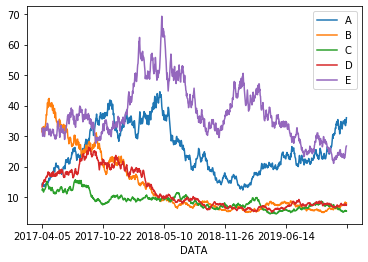

In [26]:
acompanhamento.plot()

# Pandas: onde a mágica acontece

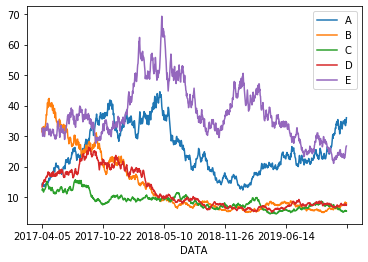

In [27]:
a = acompanhamento.plot()

[Text(0, 0.5, 'Preço')]

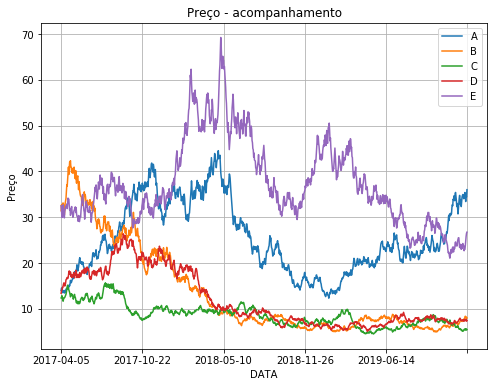

In [28]:
acompanhamento.plot(title='Preço - acompanhamento', figsize=(8, 6), grid=True).set(ylabel='Preço')

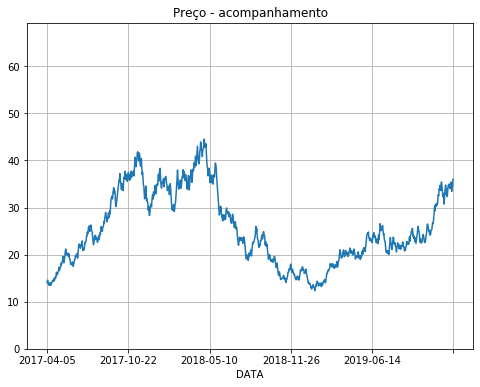

<function __main__.plota_ativo(label)>

In [29]:
def plota_ativo(label):
    m = acompanhamento.max().max()
    acompanhamento[label].plot(title='Preço - acompanhamento', figsize=(8, 6), grid=True).set(ylim=(0, m))
interact(plota_ativo, label=ativos)

In [30]:
ativos.tolist()

['A', 'B', 'C', 'D', 'E']

In [31]:
multi = widgets.SelectMultiple(
    options=ativos,
    value=ativos.tolist(),
    description='Ativos',
)

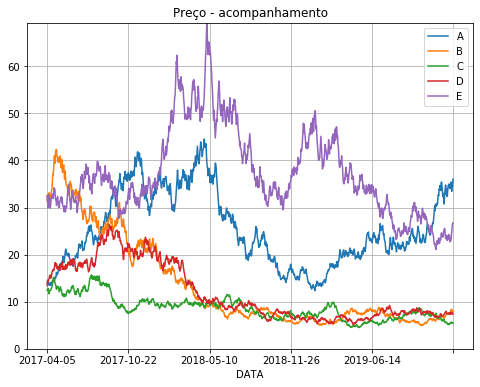

<function __main__.plota_ativo(label)>

In [32]:
def plota_ativo(label):
    m = acompanhamento.max().max()
    acompanhamento[list(label)].plot(title='Preço - acompanhamento', figsize=(8, 6), grid=True).set(ylim=(0, m))

interact(plota_ativo, label=multi)

# Janelamento + Pontos de corte

In [33]:
acompanhamento

,A,B,C,D,E
DATA,,,,,
2017-04-05,14.039357,31.423599,12.384701,13.400694,32.517493
2017-04-06,14.559127,32.722675,12.576448,14.056574,31.519695
2017-04-07,14.402427,31.179484,12.875828,14.088664,29.958482
2017-04-08,13.967761,32.280271,12.513894,14.667222,30.099958
2017-04-09,13.527560,33.080424,11.929149,14.595419,31.382635
...,...,...,...,...,...
2019-12-26,34.291865,8.395594,5.405122,7.434858,23.754771
2019-12-27,33.435358,8.135087,5.665829,7.717393,24.829573
2019-12-28,34.722397,8.235942,5.408104,7.679611,25.848309


In [34]:
acompanhamento.rolling(4).mean()

,A,B,C,D,E
DATA,,,,,
2017-04-05,NaN,NaN,NaN,NaN,NaN
2017-04-06,NaN,NaN,NaN,NaN,NaN
2017-04-07,NaN,NaN,NaN,NaN,NaN
2017-04-08,14.242168,31.901507,12.587718,14.053289,31.023907
2017-04-09,14.114219,32.315713,12.473830,14.351970,30.740192
...,...,...,...,...,...
2019-12-26,34.647075,8.054611,5.504914,7.513447,23.120718
2019-12-27,34.322520,8.124639,5.544129,7.617585,23.654621
2019-12-28,34.465441,8.209887,5.523050,7.635602,24.359187


In [35]:
slider = widgets.IntRangeSlider(
    value=[0, len(acompanhamento)],
    min=0,
    max=len(acompanhamento),
    step=1,
    description='Dias:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

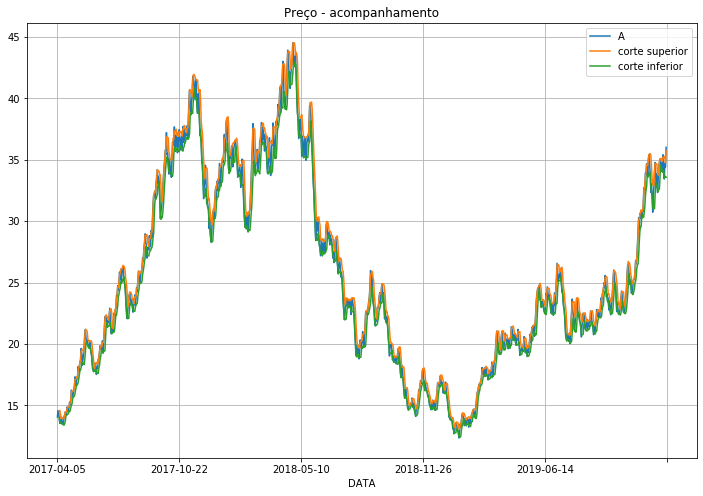

<function __main__.plota_ativo(label, dias)>

In [36]:
def plota_ativo(label, dias):
    window = acompanhamento[label][dias[0]: dias[1]].rolling(4)
    data = {
        label: acompanhamento[label][dias[0]: dias[1]],
        'corte superior': window.mean() + window.std(),
        'corte inferior': window.mean() - window.std()
    }
    plot_df = pd.DataFrame(data).plot(title='Preço - acompanhamento', figsize=(12, 8), grid=True)
    
interact(plota_ativo, label=ativos, dias=slider)

# .groupby

## Carregar o dataframe de "pessoas.csv"

In [37]:
pdf = pd.read_csv('pessoas.csv')
pdf.sample(5)

,idade,data_nasc,signo,bairro,cidade,altura,peso,tipo_sanguineo,cor,salario
141,20,24/08/2000,Virgem,Boa Saúde,Novo Hamburgo,"1,78",68,A+,vermelho,6565.767966
83,78,17/09/1942,Virgem,Boa Vista,Novo Hamburgo,"1,65",56,A-,laranja,470.213205
231,60,27/11/1960,Sagitário,Jardim,Sapucaia do Sul,"1,76",60,O-,vermelho,292.091427
55,50,14/02/1970,Aquário,São Sebastião,Porto Alegre,"1,64",77,A-,amarelo,6256.640702
52,71,27/06/1949,Câncer,Harmonia,Canoas,"1,74",48,AB+,preto,613.707902


## Convertendo data_nasc para datetime

In [39]:
convertido = pd.to_datetime(pdf['data_nasc'].tolist(), infer_datetime_format=True)
convertido

DatetimeIndex(['1940-06-12', '1977-09-10', '1977-05-24', '1946-08-24',
               '1978-02-13', '1989-08-23', '1982-01-15', '1953-09-16',
               '1977-08-19', '1978-09-10',
               ...
               '1998-10-08', '1976-10-05', '1989-12-22', '1976-11-11',
               '1973-03-08', '1990-08-21', '1996-04-05', '2002-10-08',
               '1956-04-19', '1966-04-17'],
              dtype='datetime64[ns]', length=300, freq=None)

In [40]:
pdf['data_nasc'] = convertido

## O objeto agrupado

In [41]:
agrupado = pdf.groupby('signo')

In [42]:
agrupado.get_group('Aquário')

,idade,data_nasc,signo,bairro,cidade,altura,peso,tipo_sanguineo,cor,salario
4,42,1978-02-13,Aquário,Quinta,Rio Grande,"1,60",110,B-,amarelo,3803.589907
38,56,1964-02-14,Aquário,Kayser,Caxias do Sul,"1,65",95,A+,amarelo,3372.522150
44,48,1972-08-02,Aquário,Azenha,Porto Alegre,"1,87",65,B+,roxo,6562.458787
53,54,1966-04-02,Aquário,Cassino,Rio Grande,"1,66",51,B-,vermelho,6160.701251
55,50,1970-02-14,Aquário,São Sebastião,Porto Alegre,"1,64",77,A-,amarelo,6256.640702
66,40,1980-02-02,Aquário,Centro,Pinhal,"1,76",71,AB-,vermelho,6057.216990
71,72,1948-02-19,Aquário,Boa Vista,Porto Alegre,"1,68",104,AB+,azul,6706.262082
79,31,1989-01-23,Aquário,Sete,Sapucaia do Sul,"1,73",86,B-,amarelo,2983.147423
118,54,1966-01-27,Aquário,Planaltina,Passo Fundo,"1,69",84,O-,verde,3288.356988
124,60,1960-11-02,Aquário,Scharlau,São Leopoldo,"1,80",69,B-,vermelho,5134.843116


In [43]:
@interact
def select_signo(signo=pdf['signo'].unique()):
    display(agrupado.get_group(signo))

,idade,data_nasc,signo,bairro,cidade,altura,peso,tipo_sanguineo,cor,salario
0,80,1940-06-12,Sagitário,Passo da Areia,Porto Alegre,"1,78",59,O+,verde,4575.597484
11,19,2001-11-27,Sagitário,Belvedere,Santa Cruz do Sul,"1,64",79,AB-,verde,2165.483886
15,70,1950-03-12,Sagitário,União das Vilas,Uruguaiana,"2,00",97,AB-,vermelho,5905.051627
29,46,1974-06-12,Sagitário,Guajuviras,Canoas,"1,81",61,AB+,azul,3084.671946
39,55,1965-12-12,Sagitário,Sarandi,Porto Alegre,"1,65",56,AB-,preto,4115.111976
46,31,1989-05-12,Sagitário,Centro,Pouso Novo,"1,72",91,A-,verde,6447.873347
63,33,1987-11-25,Sagitário,Estalagem,Viamão,"1,80",73,O-,preto,2848.020998
69,26,1994-12-14,Sagitário,Mário Quintana,Porto Alegre,"1,75",45,O+,vermelho,4781.284073
78,77,1943-11-22,Sagitário,Jardim Krahe,Viamão,"1,64",74,B-,azul,5519.091206
84,51,1969-02-12,Sagitário,Nossa Senhora das Graças,Caxias do Sul,"1,66",83,B+,azul,2295.660611


In [44]:
@interact
def agrupa(column=pdf.columns):
    agrupado = pdf.groupby(column)
    lista_de_possibilidades = pdf[column].unique()
    lista_de_possibilidades.sort()
    
    @interact
    def seleciona(label=lista_de_possibilidades):
        display(agrupado.get_group(label))

,idade,data_nasc,signo,bairro,cidade,altura,peso,tipo_sanguineo,cor,salario
33,18,2002-01-15,Capricórnio,Medianeira,Cachoeira do Sul,"1,72",57,B+,preto,42.783992
68,18,2002-02-03,Peixes,Medianeira,Porto Alegre,"1,66",79,O+,vermelho,3639.942503
96,18,2002-08-07,Câncer,Vila Jardim,Porto Alegre,"1,70",50,A-,vermelho,970.919645
171,18,2002-04-15,Áries,Campestre do Menino Deus,Santa Maria,"1,87",101,O-,roxo,6546.638926
208,18,2002-12-24,Capricórnio,Boqueirão,Passo Fundo,"1,66",88,AB-,verde,3884.001298
215,18,2002-05-27,Gêmeos,Santana,Porto Alegre,"1,56",79,AB+,vermelho,3015.617308
285,18,2002-11-03,Peixes,Progresso,Alegrete,"2,00",64,B+,roxo,6476.468792
297,18,2002-10-08,Leão,Cidade de Águeda,Rio Grande,"1,67",78,AB-,verde,2270.466590


In [45]:
agrupado = pdf.groupby('signo')

In [46]:
agrupado.size()

signo
Aquário        22
Capricórnio    25
Câncer         26
Escorpião      24
Gêmeos         25
Leão           23
Libra          21
Peixes         29
Sagitário      34
Touro          19
Virgem         21
Áries          31
dtype: int64

## Agrupando por quantils

1. Faz o corte de quantils usando o pd.qcut
2. Usa o resultado como argumento do groupy

In [47]:
quintil_corte = pd.qcut(x=pdf['salario'], q=5)
quintils = pdf.groupby(quintil_corte)

In [48]:
quintils.groups

{Interval(23.962999999999997, 1868.834, closed='right'): Int64Index([  3,   7,   9,  17,  30,  33,  34,  35,  45,  52,  54,  65,  72,
              76,  83,  85,  88,  90,  95,  96,  98, 100, 112, 113, 115, 116,
             120, 133, 135, 143, 144, 151, 152, 162, 166, 174, 182, 190, 192,
             194, 198, 203, 204, 212, 213, 217, 220, 222, 227, 231, 235, 238,
             239, 240, 245, 255, 258, 280, 284, 290],
            dtype='int64'),
 Interval(1868.834, 3035.92, closed='right'): Int64Index([ 10,  11,  23,  28,  56,  58,  60,  61,  63,  67,  70,  74,  75,
              77,  79,  84,  86, 123, 125, 128, 136, 138, 140, 142, 153, 154,
             156, 158, 164, 169, 170, 173, 180, 181, 183, 185, 187, 196, 205,
             207, 214, 215, 226, 230, 233, 236, 244, 248, 254, 256, 257, 266,
             267, 271, 273, 275, 287, 296, 297, 298],
            dtype='int64'),
 Interval(3035.92, 4141.761, closed='right'): Int64Index([  1,   4,   6,  14,  18,  20,  24,  26,  27,  29,  38

In [49]:
quintils.size()

salario
(23.962999999999997, 1868.834]    60
(1868.834, 3035.92]               60
(3035.92, 4141.761]               60
(4141.761, 5648.161]              60
(5648.161, 7177.359]              60
dtype: int64

## Usando o grouper

In [50]:
por_ano = pdf.groupby(pd.Grouper(key='data_nasc', freq='Y'))
por_ano.size()

data_nasc
1940-12-31    4
1941-12-31    1
1942-12-31    6
1943-12-31    1
1944-12-31    4
             ..
1998-12-31    4
1999-12-31    5
2000-12-31    3
2001-12-31    5
2002-12-31    8
Freq: A-DEC, Length: 63, dtype: int64

In [51]:
por_ano['salario'].mean()

data_nasc
1940-12-31    4097.254842
1941-12-31    2005.859257
1942-12-31    3505.410046
1943-12-31    5519.091206
1944-12-31    4007.916318
                 ...     
1998-12-31    2624.038162
1999-12-31    3717.451444
2000-12-31    6766.676511
2001-12-31    3765.351826
2002-12-31    3355.854882
Freq: A-DEC, Name: salario, Length: 63, dtype: float64

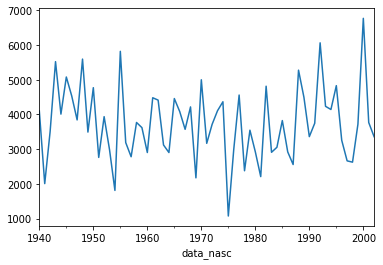

In [52]:
por_ano['salario'].mean().plot()

# .agg

In [53]:
agregado = pdf.groupby('signo').agg({ 
    'idade':'mean',
    'salario':['min','mean', 'max', 'std'],
    'cidade':'size',
    'tipo_sanguineo': 'size'
})
agregado

idade      salario                                         \
                  mean          min         mean          max          std   
signo                                                                        
Aquário      47.954545   551.049650  4145.633445  7134.824124  2099.069663   
Capricórnio  42.320000    42.783992  3644.838354  6854.941080  1913.465037   
Câncer       48.615385   198.562668  3153.202881  7163.209304  2309.044763   
Escorpião    49.791667   264.741703  3182.941348  6175.091873  1605.288354   
Gêmeos       49.840000   573.977681  3595.664410  6992.077974  1745.325198   
Leão         45.304348   214.559990  3177.920544  6179.475333  1921.020549   
Libra        47.428571    23.963540  3540.819827  7174.038878  2010.890443   
Peixes       50.448276   211.474858  3818.083595  6571.052262  1936.651364   
Sagitário    51.176471    74.298936  3907.958908  6980.080813  1956.859050   
Touro        50.684211   796.711090  4234.141045  7177.359384  1962.493357   
Virgem       46.238095   470.213205  3196.868180  6565.767966  2136.697290   
Áries        49.967742  1284.862300  4237.205054  6978.286174  1458.531531   

            cidade tipo_sanguineo  
              size           size  
signo                              
Aquário         22             22  
Capricórnio     25             25  
Câncer          26             26  
Escorpião       24             24  
Gêmeos          25             25  
Leão            23             23  
Libra           21             21  
Peixes          29             29  
Sagitário       34             34  
Touro           19             19  
Virgem          21             21  
Áries           31             31

In [54]:
pdf.groupby('idade').agg({
    'salario': 'max',
    'cidade': 'size',
    'cor': ['size', 'first']
})

salario cidade  cor          
               max   size size     first
idade                                   
18     6546.638926      8    8     preto
19     6562.905064      5    5     verde
20     7163.209304      3    3  vermelho
21     5088.907623      5    5     preto
22     5584.391295      4    4   laranja
...            ...    ...  ...       ...
76     7177.359384      4    4  vermelho
77     5519.091206      1    1      azul
78     6028.660536      6    6     verde
79     2005.859257      1    1   laranja
80     6518.733434      4    4     verde

[63 rows x 4 columns]

In [55]:
agregado.loc['Libra', 'salario']

min       23.963540
mean    3540.819827
max     7174.038878
std     2010.890443
Name: Libra, dtype: float64

In [56]:
agregado.loc['Libra', ('salario', 'min')]

23.96354033476501

# .fillna

## Carregar o DataFrame "pesos.csv".

In [57]:
df = pd.read_csv('pesos.csv')
df.sample(5)

,peso,sexo,idade
633,51.535722,f,49
476,65.427075,m,24
333,46.685722,f,43
1989,50.225775,f,53
1104,47.089619,f,46


## O dataset veio inteiro?

In [58]:
df.isnull().sum()

peso     93
sexo      0
idade     0
dtype: int64

Primeiro chute: TACA A MÉDIA

In [59]:
df.fillna(df['peso'].mean(), inplace=True)

## Agrupar por sexo e contar.

In [60]:
df.groupby('sexo').size()

sexo
f    1000
m    1000
dtype: int64

## Agrupar por sexo e agregar média, desvio padrão, min, max da idade e do peso.

In [61]:
ops = ['min', 'mean', 'max', 'std']

In [62]:
df.groupby('sexo').agg({'idade': ops, 'peso': ops})

idade                              peso                                
       min    mean max        std        min       mean        max       std
sexo                                                                        
f       16  37.848  59  12.519010  41.476696  51.030906  61.407399  4.174569
m       16  37.483  59  12.688763  55.787034  69.894786  90.585326  5.121478

In [63]:
df

,peso,sexo,idade
0,47.752317,f,18
1,63.697299,m,42
2,50.311009,f,30
3,52.309438,f,45
4,67.000687,m,31
...,...,...,...
1995,67.069968,m,56
1996,48.761862,f,22
1997,50.813061,f,52
1998,76.785077,m,43


## Separar o df em dois: 
* mdf: contendo só o recorte de sexo == 'm'
* fdf: contendo só o recorte de sexo == 'f'

In [64]:
mask_m = df['sexo'] == 'm'
mask_f = df['sexo'] == 'f'

In [65]:
mdf = df[mask_m]
fdf = df[mask_f]

## Plotando a distribuição

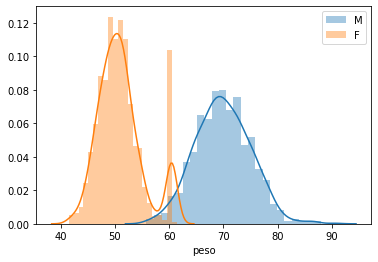

In [66]:
sns.distplot(mdf['peso'], label='M')
sns.distplot(fdf['peso'], label='F')
plt.legend()

Olha aquela ponta ali...

## Identificando o grupo.

In [67]:
df = pd.read_csv('pesos.csv')
mdf = df[df['sexo'] == 'm'].copy()
fdf = df[df['sexo'] == 'f'].copy()


In [68]:
mdf.isnull().sum()

peso     0
sexo     0
idade    0
dtype: int64

In [69]:
fdf.isnull().sum()

peso     93
sexo      0
idade     0
dtype: int64

In [70]:
fdf.fillna(fdf['peso'].mean(), inplace=True)

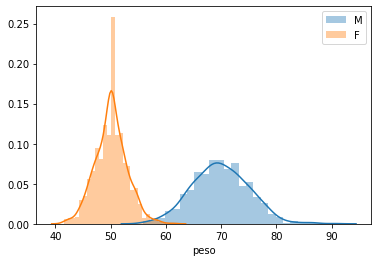

In [71]:
sns.distplot(mdf['peso'], label='M')
sns.distplot(fdf['peso'], label='F')
plt.legend()

## Ainda existem possibilidades para o fillna

* method='ffill'
* method='bfill'

In [152]:
a = pd.DataFrame(np.arange(10), columns=['A'])
a.loc[3:5] = None
a

,A
0,0.0
1,1.0
2,2.0
3,NaN
4,NaN
5,NaN
6,6.0
7,7.0
8,8.0
9,9.0


In [154]:
a.fillna(method='ffill')

,A
0,0.0
1,1.0
2,2.0
3,2.0
4,2.0
5,2.0
6,6.0
7,7.0
8,8.0
9,9.0


In [155]:
a.fillna(method='bfill')

,A
0,0.0
1,1.0
2,2.0
3,6.0
4,6.0
5,6.0
6,6.0
7,7.0
8,8.0
9,9.0
